# SumNet Prediction Model

This notebook allows you to predict future SumNet values based on the data provided. You can specify how many years into the future you want to make predictions for.

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load and display the data
data_path = "../data/random_daily_mock_sumnet_data.csv" 
df = pd.read_csv(data_path)
df.head()

,Date,Year,Month,SumNet
0,2062-01-01,62,1,11861.663447
1,2062-01-02,62,1,28570.714886
2,2062-01-03,62,1,22227.824313
3,2062-01-04,62,1,18361.096042
4,2062-01-05,62,1,5524.540573


In [2]:
# Aggregate the data by year to get the average SumNet values per year
yearly_data = df.groupby('Year')['SumNet'].mean().reset_index()

# Preparing the data for the model
X = yearly_data[['Year']]
y = yearly_data['SumNet']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Training a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [3]:
# Function to predict future SumNet values
def predict_future_sumnet(years_into_future, latest_year):
    future_years = np.arange(latest_year + 1, latest_year + years_into_future + 1).reshape(-1, 1)
    predictions = model.predict(future_years)
    return predictions

# User input for prediction
years_into_future = int(input('Enter the number of years into the future you want predictions for: '))
latest_year = df['Year'].max()
future_predictions = predict_future_sumnet(years_into_future, latest_year)

print(f'Future SumNet predictions for the next {years_into_future} years: {future_predictions}')

Future SumNet predictions for the next 5 years: [15524.10875958 15613.85707337 15703.60538717 15793.35370096
 15883.10201475]


C:\Users\weerakorn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


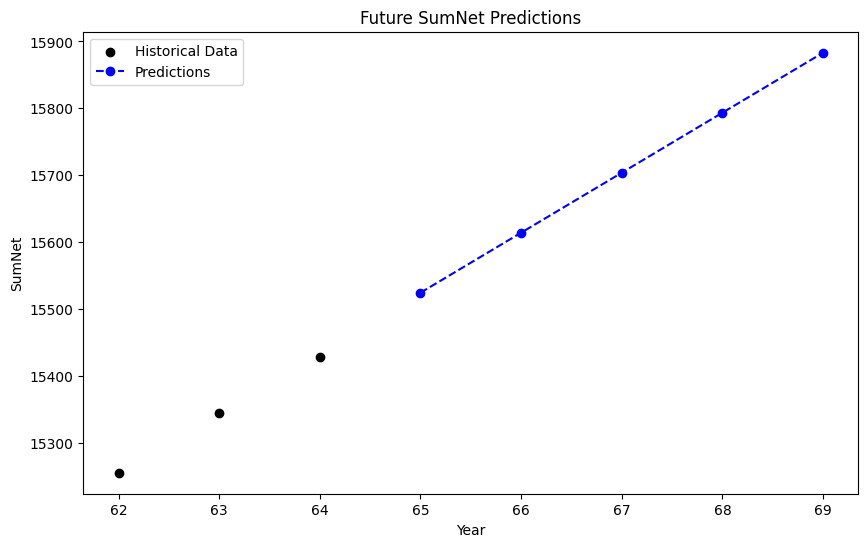

In [4]:
# Optionally, visualize the predictions
plt.figure(figsize=(10, 6))
plt.scatter(yearly_data['Year'], yearly_data['SumNet'], color='black', label='Historical Data')
plt.plot(np.arange(latest_year + 1, latest_year + years_into_future + 1), future_predictions, color='blue', linestyle='--', marker='o', label='Predictions')
plt.title('Future SumNet Predictions')
plt.xlabel('Year')
plt.ylabel('SumNet')
plt.legend()
plt.show()

In [5]:
print(future_predictions)

[15524.10875958 15613.85707337 15703.60538717 15793.35370096
 15883.10201475]


In [6]:
import pickle

def save_model(model, filename):
    with open(filename, 'wb') as file:
        pickle.dump(model, file)


In [7]:
save_model(model, 'linear_regression_model.pkl')